Import Everything

In [32]:
import os
import glob
import pandas as pd

if not os.path.exists('DATASET'):
    os.makedirs('DATASET')
if not os.path.exists('DATASET/CLEAN'):
    os.makedirs('DATASET/CLEAN')

right_files = glob.glob('DATASET/RAW/* RIGHT.csv')
left_files = glob.glob('DATASET/RAW/* LEFT.csv')
files = glob.glob('DATASET/RAW/* TEST* *.csv')
files.sort()

path = 'DATASET/CLEAN/'
right_df, left_df = [], []

print(files)

['DATASET/RAW/CELINE TEST LEFT.csv', 'DATASET/RAW/CELINE TEST RIGHT.csv', 'DATASET/RAW/GELO TEST LEFT.csv', 'DATASET/RAW/GELO TEST RIGHT.csv', 'DATASET/RAW/JIMI TEST LEFT.csv', 'DATASET/RAW/JIMI TEST RIGHT.csv', 'DATASET/RAW/JIMI TEST STRAIGHT.csv', 'DATASET/RAW/JIMI TEST2 RIGHT.csv', 'DATASET/RAW/JIMI TEST3 RIGHT.csv', 'DATASET/RAW/JIMI TEST4 RIGHT.csv', 'DATASET/RAW/JOV TEST LEFT.csv', 'DATASET/RAW/JOV TEST RIGHT.csv', 'DATASET/RAW/OKAT TEST LEFT.csv', 'DATASET/RAW/OKAT TEST RIGHT.csv']


Combine and save into CSV

In [33]:
cutoff = 400

for file in right_files:
    df = pd.read_csv(file, header=None)
    df = df.iloc[cutoff:-cutoff]
    right_df.append(df)

for file in left_files:
    df = pd.read_csv(file, header=None)
    df = df.iloc[cutoff:-cutoff]
    left_df.append(df)


right_combined = pd.concat(right_df)
left_combined = pd.concat(left_df)

right_combined.to_csv(f'{path}COMBINED_right.csv', index=False)
left_combined.to_csv(f'{path}COMBINED_left.csv', index=False)

PLOT and SPLIT

In [34]:
import matplotlib.pyplot as plt

plot_right = pd.read_csv(f'{path}COMBINED_right.csv')
plot_left = pd.read_csv(f'{path}COMBINED_left.csv')

In [35]:
x_right = plot_right.index
y_right = plot_right

x_left = plot_left.index
y_left = plot_left

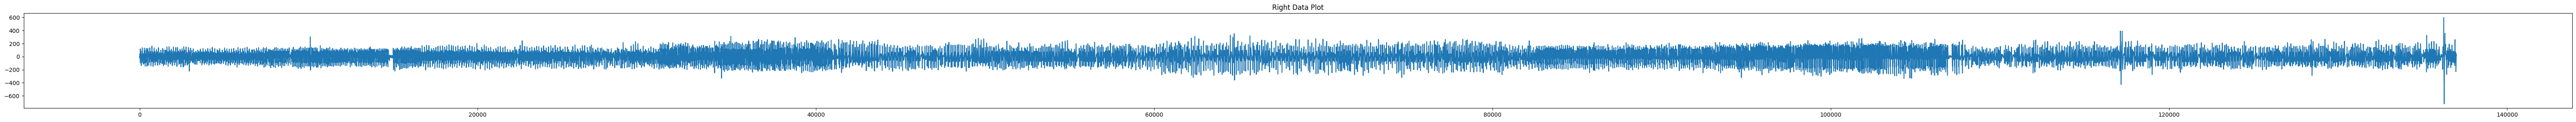

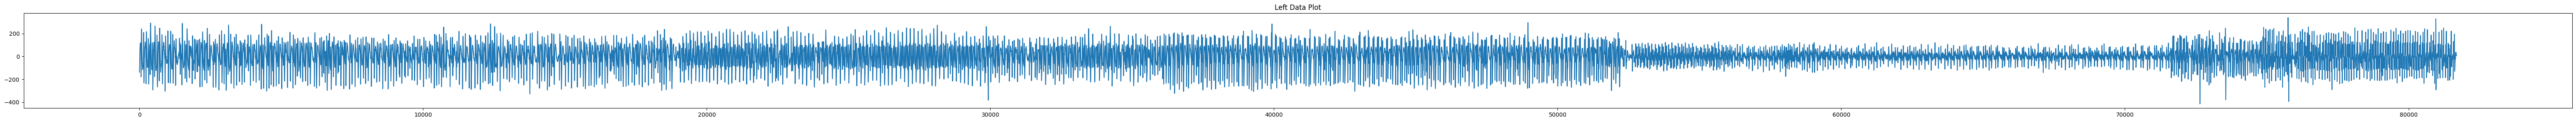

In [36]:
title_right = 'Right Data Plot'
title_left = 'Left Data Plot'

fig1, ax1 = plt.subplots(figsize=(80,3))
ax1.plot(x_right,y_right)
ax1.set_title(title_right)

fig2, ax2 = plt.subplots(figsize=(80,3))
ax2.plot(x_left, y_left)
ax2.set_title(title_left)

plt.show()

fig1.savefig(f'{path}{title_right}.jpg', dpi=300)
fig2.savefig(f'{path}{title_left}.jpg',dpi=300)

WHY DID I DO THE SHITS ABOVE IT MIGHT BE MORE USEFUL TO STRIP PER FILE

In [37]:
#for file in files:
#    df = pd.read_csv(file)
#    df = df.iloc[500:-500]
#    name = file[12:-4].split()
#    FName = name[0] + '/'
#    name = ' '.join(name)
#
#    print(name)
#
#    if not os.path.exists(f'{path}{FName}'):
#        os.makedirs(f'{path}{FName}')
#
#    x = df.index
#    y = df
#
#    plt.figure(figsize=(80,3))
#    plt.plot(x,y)
#    plt.ylim(-300,300)
#    plt.axhline(y=-200, linestyle=':', color='red')
#    plt.axhline(y=-180, linestyle=':', color='red')
#    plt.axhline(y=180, linestyle=':', color='red')
#    plt.axhline(y=200, linestyle=':', color='red')
#    plt.title(name)
#    plt.savefig(f'{path}{FName}{name}.jpg', dpi=300)

HOW IN THE FLYING FUCK DO I STRIP THIS

In [38]:
import collections
import csv
import numpy as np

length = 50

queue = collections.deque(maxlen=length)

isChecked = False
look_left, look_right = [], []
tresh = 195.00
count = 1

df_dataset = pd.DataFrame()

with open(f'{path}COMBINED_left.csv', 'r') as f:
    reader = csv.reader(f)

    for row in reader:
        queue.append(row[0])
        
        if float(row[0]) <= -tresh and isChecked != True:
           isChecked = True

        if isChecked == True:
            count+=1

        if count >= length/2 and isChecked == True:
            count = 1
            isChecked = False
            array = np.array(queue)
            queue.clear()
            look_left.append(array)
            df_left = pd.DataFrame(look_left)
            df_left.insert(loc=0,column='LABEL',value='LEFT')

with open(f'{path}COMBINED_right.csv', 'r') as f:
    reader = csv.reader(f)

    for row in reader:
        
        queue.append(row[0])
        
        if float(row[0]) >= tresh and isChecked != True:
           isChecked = True
        
        if isChecked == True:
            count+=1
        
        if count >= length/2 and isChecked == True:
            count = 1
            isChecked = False
            array = np.array(queue)
            queue.clear()
            look_right.append(array)
            df_right = pd.DataFrame(look_right)
            df_right.insert(loc=0,column='LABEL',value='RIGHT')

df_left = df_left.dropna()
df_right = df_right.dropna()
df_left.to_csv(f'{path}LEFT.csv')
df_right.to_csv(f'{path}RIGHT.csv')

df_dataset = pd.concat([df_dataset, df_left, df_right], ignore_index=True)
df_dataset.to_csv(f'{path}DATASET.csv', index=False, header=False)
df_dataset

,LABEL,0,1,2,3,4,5,6,7,8,...,40,41,42,43,44,45,46,47,48,49
0,LEFT,-82.28,-75.18,-69.12,-65.37,-61.97,-60.93,-62.3,-51.66,-15.75,...,-54.41,-37.28,-27.23,-19.07,-13.15,-8.86,-5.88,-4.19,-2.49,0.88
1,LEFT,111.71,104.97,95.85,87.88,84.4,83.66,81.83,79.12,76.78,...,212.88,216.29,214.66,205.71,191.93,179.47,168.77,157.02,144.4,131.91
2,LEFT,-88.04,-85.98,-83.65,-82.54,-82.4,-74.08,-49.8,-15.18,21.53,...,-93.52,-70.57,-54.27,-42.53,-32.01,-20.44,-9.5,-1.04,6.07,15.82
3,LEFT,-98.0,-102.34,-108.28,-110.0,-111.44,-113.29,-99.28,-59.79,-10.54,...,-137.13,-119.79,-103.55,-87.47,-71.92,-57.47,-43.61,-27.23,-9.24,5.78
4,LEFT,-88.03,-89.14,-89.47,-87.8,-84.04,-81.36,-80.03,-68.35,-34.83,...,-121.91,-102.86,-83.69,-64.36,-45.51,-29.25,-13.72,2.63,14.3,19.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
749,RIGHT,45.63,48.4,52.13,57.37,63.98,71.39,81.62,86.41,69.85,...,124.29,114.43,104.91,98.1,95.8,93.09,82.58,66.32,53.11,44.09
750,RIGHT,23.83,29.24,28.37,26.67,29.46,34.66,36.91,40.85,53.71,...,124.64,113.14,101.31,90.84,83.15,75.09,64.38,53.36,44.13,35.57
751,RIGHT,133.32,129.03,124.42,119.52,114.37,109.01,103.46,97.75,91.91,...,-21.19,-71.91,-118.45,-159.98,-197.99,-233.05,-264.55,-292.62,-317.68,-339.88
752,RIGHT,-218.17,-201.39,-186.17,-167.09,-145.8,-124.84,-104.09,-82.17,-59.1,...,86.12,62.27,43.41,32.49,30.69,36.77,45.85,55.01,66.34,78.91


481


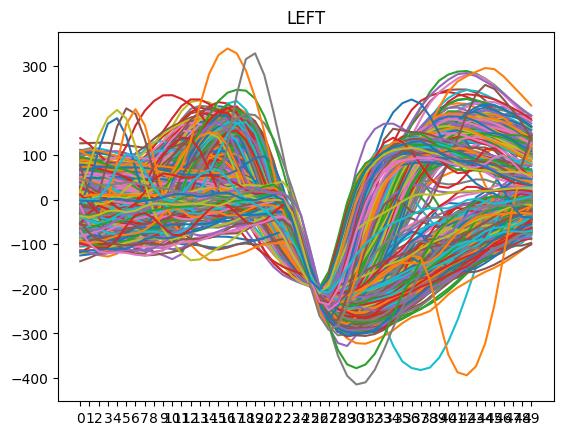

In [39]:
left_stripped = pd.read_csv(f'{path}LEFT.csv', index_col=0)
left_stripped = left_stripped.iloc[:,1:]
print(len(left_stripped))

for index, row in left_stripped.iterrows():
    plt.plot(row.index, row.values)

plt.title('LEFT')
plt.show()

273


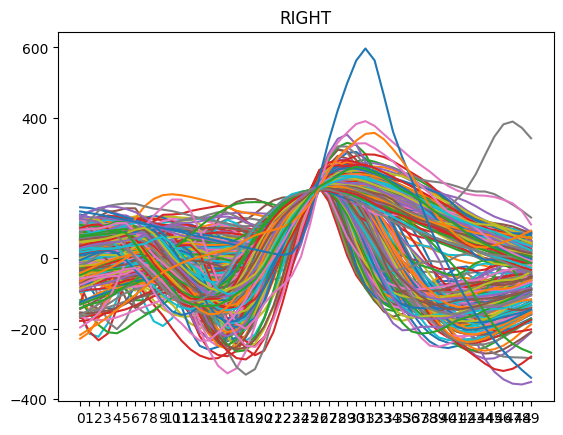

In [40]:
right_stripped = pd.read_csv(f'{path}RIGHT.csv', index_col=0)
right_stripped = right_stripped.iloc[:,1:]
print(len(right_stripped))

for index, row in right_stripped.iterrows():
    plt.plot(row.index, row.values)

plt.title('RIGHT')
plt.show()